# Car Price Prediction ( Regression - Continuous Value Prediction)

## Import Libraries, Load Data and See Top 5 Records. 

In [90]:
import pandas as pd
import ydata_profiling

import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams

%matplotlib inline

# Read Data
car_dataset = pd.read_csv(r'Car_Data/CarPrice_Assignment.csv')
print(car_dataset.shape)
car_dataset.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Statistical Analysis

## Check variables information

In [91]:
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Check variables statistical properties

In [92]:
print(car_dataset.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

# Exploratory Data Analysis (EDA) 

## Carbody Vs Fuel System

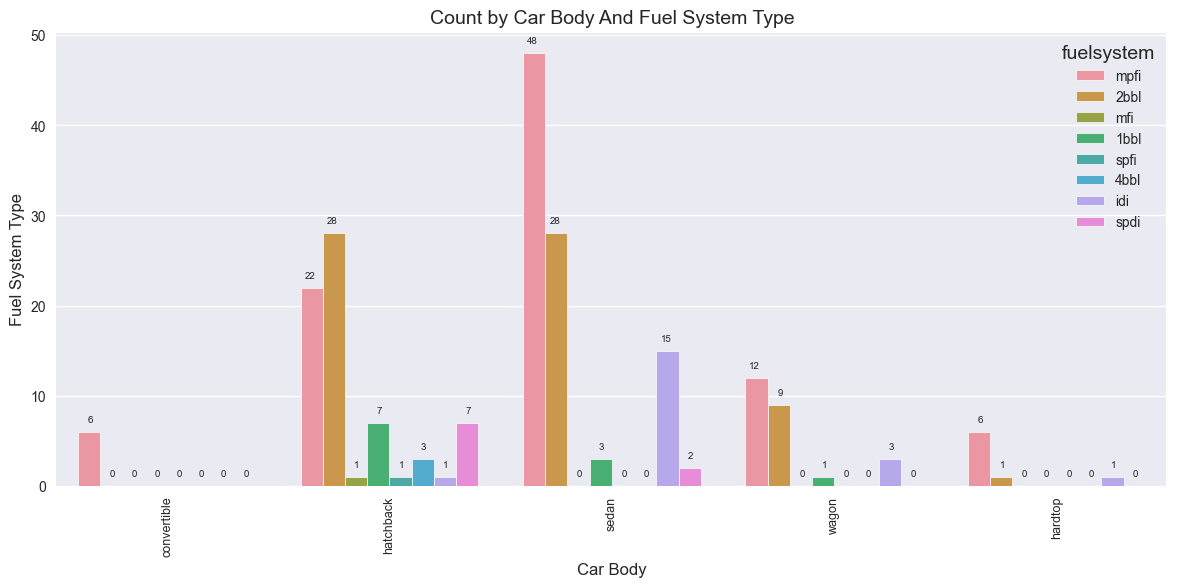

In [93]:
rcParams['figure.figsize'] = 12, 6.1
plt.rcParams["figure.autolayout"] = True

sns.set_style("darkgrid")

b = sns.countplot(data=car_dataset, x='carbody', hue='fuelsystem')

# Add a border to the plot
sns.despine(bottom=True, left=True)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

graphe_title = 'Count by Car Body And Fuel System Type'
b.axes.set_title(graphe_title,fontsize=14) 
plt.xlabel('Car Body', fontsize=12 )
plt.ylabel('Fuel System Type', fontsize=12)
plt.xticks(fontsize=9,rotation=90)
for p in b.patches:
    b.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 1.5, p.get_height()), 
                   ha = 'right', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=7)
plt.savefig('Count by Car Body And Fuel System Type.jpg')
plt.show()

## Correlation of target with other variables 

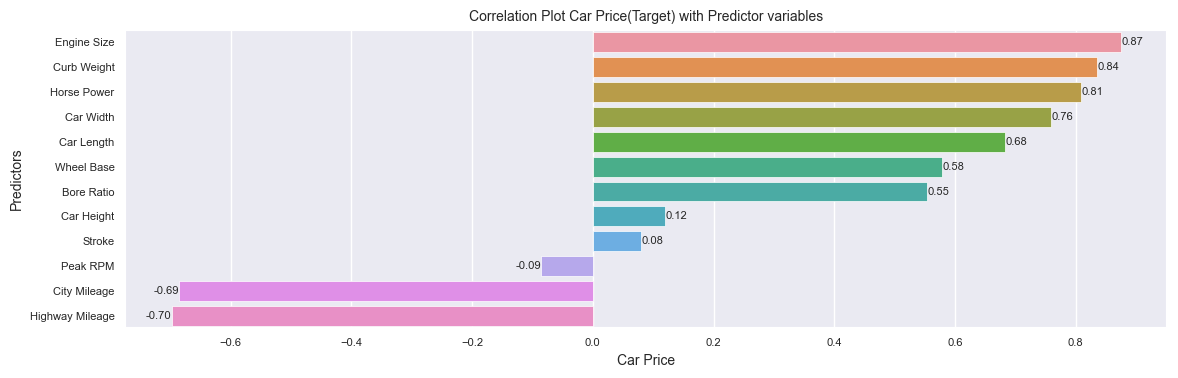

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 12, 4

car_dataset_copy = car_dataset.copy()

car_dataset_copy.rename(columns={'enginesize':'Engine Size', 'curbweight':'Curb Weight', 'horsepower':'Horse Power', 'carwidth':'Car Width',
                                'carlength':'Car Length', 'wheelbase':'Wheel Base', 'boreratio':'Bore Ratio', 'carheight':'Car Height',
                                'stroke':'Stroke', 'peakrpm':'Peak RPM', 'citympg':'City Mileage', 'highwaympg':'Highway Mileage', 'price':'Car Price'}, inplace=True)

corr = car_dataset_copy.corr(numeric_only=True)

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

corr_with_target = corr[['Car Price']].sort_values(by='Car Price', ascending=False)
corr_with_target.drop(labels=['Car Price', 'car_ID', 'compressionratio', 'symboling'], axis=0, inplace=True)

ax = sns.barplot(x='Car Price', y=corr_with_target.index, data=corr_with_target)
plt.yticks(fontsize=10)
plt.ylabel('Predictors', fontsize=10)
plt.xlabel('Car Price', fontsize=10)
plt.title('Correlation Plot - Car Price with Predictor variables', fontsize=12)

# Add correlation values on the right or left side of the bars based on sign
for p, value in zip(ax.patches, corr_with_target['Car Price']):
    width = p.get_width()
    ha = 'right' if value < 0 else 'left'
    width_adj = 0.0 if value < 0 else 0.001
    plt.text(width + width_adj, p.get_y() + p.get_height() / 2, f'{value:.2f}', ha=ha, va='center', fontsize=8)



# Reduce font size for y-axis ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Reduce font size for x-axis label
plt.xlabel('Car Price', fontsize=10)

# Reduce font size for title
plt.title('Correlation Plot Car Price(Target) with Predictor variables', fontsize=10)

plt.savefig('Correlation Plot.jpg')
plt.show()
plt.close()


## Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

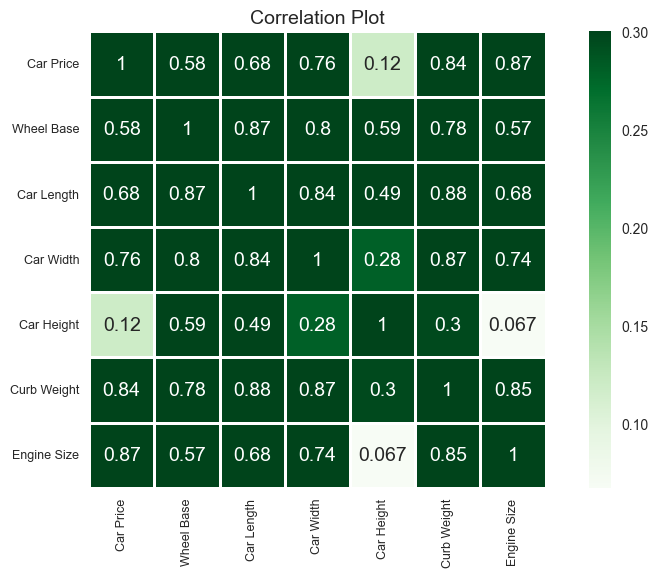

In [95]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

rcParams['figure.figsize'] = 9,6; 

corr = car_dataset_copy.corr(numeric_only=True); 

df_for_corr = car_dataset_copy[['Car Price', 'Wheel Base', 'Car Length', 'Car Width','Car Height', 'Curb Weight', 'Engine Size']]

df_corr = df_for_corr.corr(numeric_only=True); 

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

b = sns.heatmap(df_corr, annot=True, linewidths=1, cmap='Greens',square=True, vmax=.3)
plt.xticks(fontsize=9,rotation=90)
plt.yticks(fontsize=9,rotation=0)
graphe_title = 'Correlation Plot'
b.axes.set_title(graphe_title,fontsize=14) 

# Data Preprocessing

## Null Value Analsysis and Treatment

In [96]:
car_dataset.isnull().sum().sum()

0

## Train Test Split

In [97]:
from sklearn.model_selection import train_test_split

predictors = car_dataset.drop(labels=['price'], axis=1)
target = car_dataset['price']

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors,target, test_size=0.2, random_state=1)

print('Train predictor size: ', train_predictors.shape)
print('Train target size:', test_target.shape)

print('Test predictor size:', test_predictors.shape)
print('Test target size:', test_target.shape)


Train predictor size:  (164, 25)
Train target size: (41,)
Test predictor size: (41, 25)
Test target size: (41,)


## Categorical Variable Treatment

In [98]:
# List down categorical vairables 

car_features = car_dataset.select_dtypes(include='object').columns.to_list()

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Ordinal Features 
ordinal_features = ['doornumber', 'cylindernumber']

# Apply Ordinal encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ordinal_encoded_train_predictors = train_predictors.copy() # copy train_predictors 
ordinal_encoded_train_predictors[ordinal_features] = ordinal_encoder.fit_transform(ordinal_encoded_train_predictors[ordinal_features])

ordinal_encoded_test_predictors = test_predictors.copy()
ordinal_encoded_test_predictors[ordinal_features] = ordinal_encoder.transform(ordinal_encoded_test_predictors[ordinal_features])
# display(transformed_test_predictors.head())

# Sanity check 
# transformed_train_predictors[ordinal_features]
# ordinal_encoder.categories_

# Nominal Features 
nominal_features = [x for x in car_features if x not in ordinal_features]

#Apply one hot encoding 
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_ohe_encoded_train_predictors = one_hot_encoder.fit_transform(ordinal_encoded_train_predictors[nominal_features])
array_ohe_encoded_test_predictors = one_hot_encoder.transform(ordinal_encoded_test_predictors[nominal_features])

#Convert it to df
df_ohe_encoded_train_predictors = pd.DataFrame(array_ohe_encoded_train_predictors, index=ordinal_encoded_train_predictors.index)
df_ohe_encoded_test_predictors = pd.DataFrame(array_ohe_encoded_test_predictors, index=ordinal_encoded_test_predictors.index)

#Extract only the columns that didnt need to be encoded
data_other_cols_train_predictors = ordinal_encoded_train_predictors.drop(columns=nominal_features)
data_other_cols_test_predictors = ordinal_encoded_test_predictors.drop(columns=nominal_features)

#Concatenate the two dataframes : 
encoded_train_predictors = pd.concat([df_ohe_encoded_train_predictors, data_other_cols_train_predictors], axis=1)
encoded_test_predictors = pd.concat([df_ohe_encoded_test_predictors, data_other_cols_test_predictors], axis=1)

# #import pandas as pd
# encoded_train_predictors = pd.get_dummies(ordinal_encoded_train_predictors, columns = nominal_features)
# encoded_test_predictors = pd.get_dummies(ordinal_encoded_test_predictors, columns=nominal_features)

print(encoded_train_predictors.shape)
print(encoded_test_predictors.shape)
# encoded_train_predictors.columns.tolist()

(164, 170)
(41, 170)


# Model Training 

## XGboost

In [99]:
encoded_train_predictors.columns = encoded_train_predictors.columns.astype(str) 
encoded_test_predictors.columns = encoded_test_predictors.columns.astype(str)

In [100]:
from xgboost import XGBRegressor

# Define the parameters as a dictionary
parameters = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}
xgb = XGBRegressor(**parameters)

xgb.fit(encoded_train_predictors, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Model Learning Curve 

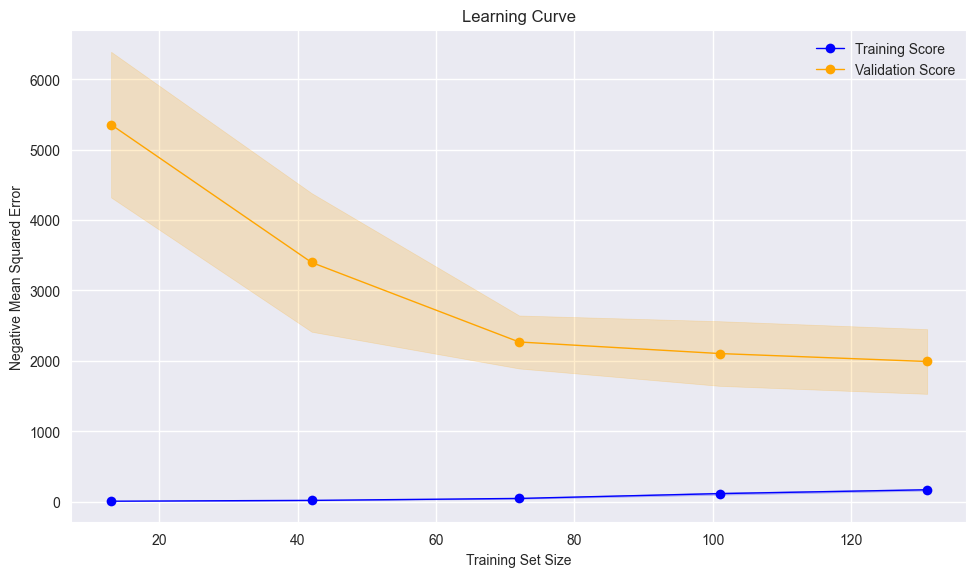

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
from numpy import sqrt

# Calculate the learning curve
train_sizes, train_scores, val_scores = learning_curve(xgb, encoded_train_predictors, train_target, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive and take the square root
train_scores = sqrt(-train_scores)
val_scores = sqrt(-val_scores)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o', linewidth=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange', marker='o', linewidth=1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='orange')
plt.xlabel('Training Set Size', fontsize=10)
plt.ylabel('Negative Mean Squared Error', fontsize=10)
plt.title('Learning Curve', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Set the y-axis tick format as whole numbers
plt.ticklabel_format(axis='y', style='plain')

plt.savefig("Learning Curve.jpg")
plt.show()

# Evaluate Trained Model

In [102]:
test_predictions = xgb.predict(encoded_test_predictors)

# Evaluate model 
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

print('RMSE Score: ',mean_squared_error(test_target, test_predictions,squared=False)) # If True returns MSE value, if False returns RMSE value.
print('R2 Score: ', r2_score(test_target, test_predictions))

RMSE Score:  2091.9209573929584
R2 Score:  0.9203623058534497


In [103]:
output_df =  test_predictors.copy()

output_df['Car Actual Price'] = test_target
output_df['Car Predicted Price'] = [np.round(pred) for pred in test_predictions]
output_df['Residual(Error>1000 (RED))'] = abs(output_df['Car Actual Price'] - output_df['Car Predicted Price'])

out_df = output_df[[ 'Car Actual Price','Car Predicted Price', 'Residual(Error>1000 (RED))']].head(20)

In [104]:
out_df.reset_index(drop=True, inplace=True)

# Define a function to map colors to values
def color_map(val):
    # print(val)
    if val > 1000:
        color = 'red'
    # elif abs(val) < 0:
    #     color = 'lightgreen'
    else:
        color = 'lightblue'
    return f'background-color: {color}'

caption_text = '<h3 style="text-align: center; font-weight: bold; font-size: 16pt"> Car Price Prediction<br>( Regression )</h3>'

styled_df = (out_df.style.applymap(color_map, subset=['Residual(Error>1000 (RED))'])
             .set_caption(caption_text)
             .set_properties(**{'border': '1px solid black'})
            )

import dataframe_image as dfi
dfi.export(styled_df, 'Predictions.jpg')

styled_df

,Car Actual Price,Car Predicted Price,Residual(Error>1000 (RED))
0,6669.000000,6598.000000,71.000000
1,7999.000000,7274.000000,725.000000
2,6338.000000,6532.000000,194.000000
3,8916.500000,6169.000000,2747.500000
4,10295.000000,9226.000000,1069.000000
5,25552.000000,30104.000000,4552.000000
6,8249.000000,7207.000000,1042.000000
7,5151.000000,5736.000000,585.000000
8,6488.000000,6383.000000,105.000000
9,10245.000000,10295.000000,50.000000
